In [71]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import chdir
from warnings import filterwarnings

chdir(r"C:\Users\Anwar\Desktop\Projects Jupyter\datasets\Spotify winner tracks")
filterwarnings('ignore')

In [2]:
# Loading files
df = pd.read_csv(r"df_complete.csv", encoding = 'utf-8', low_memory = True)

In [3]:
# Visualizing top 5 rows
df.head()

,track_uri,track,artist,artist_popularity,followers,artist_genre,track_popularity,album,year,danceability,valence,energy,tempo,loudness,speechiness,instrumentalness,liveness,acousticness,key
0,6DCZcSspjsKoFjzjrWoCdn,God's Plan,Drake,97,70260570,"['canadian hip hop', 'canadian pop', 'hip hop'...",83,Scorpion,2018,0.754,0.357,0.449,77.169,-9.211,0.1090,0.000083,0.5520,0.0332,7
1,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),Post Malone,89,39233698,"['dfw rap', 'melodic rap', 'rap']",83,beerbongs & bentleys,2018,0.585,0.129,0.520,159.801,-6.136,0.0712,0.000070,0.1310,0.1240,5
2,09mEdoA6zrmBPgTEN5qXmN,Call Out My Name,The Weeknd,96,55208147,"['canadian contemporary r&b', 'canadian pop', ...",88,"My Dear Melancholy,",2018,0.461,0.175,0.593,134.170,-4.954,0.0356,0.000000,0.3070,0.1700,1
3,0u2P5u6lvoDfwTYjAADbn4,lovely (with Khalid),Billie Eilish,89,73989789,"['art pop', 'electropop', 'pop']",88,lovely (with Khalid),2018,0.351,0.120,0.296,115.284,-10.109,0.0333,0.000000,0.0950,0.9340,4
4,7ef4DlsgrMEH11cDZd32M6,One Kiss (with Dua Lipa),Calvin Harris,85,23066688,"['dance pop', 'edm', 'electro house', 'house',...",87,One Kiss (with Dua Lipa),2018,0.791,0.592,0.862,123.994,-3.240,0.1100,0.000022,0.0814,0.0370,9


In [4]:
# Datset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_uri          500 non-null    object 
 1   track              500 non-null    object 
 2   artist             500 non-null    object 
 3   artist_popularity  500 non-null    int64  
 4   followers          500 non-null    int64  
 5   artist_genre       500 non-null    object 
 6   track_popularity   500 non-null    int64  
 7   album              500 non-null    object 
 8   year               500 non-null    int64  
 9   danceability       500 non-null    float64
 10  valence            500 non-null    float64
 11  energy             500 non-null    float64
 12  tempo              500 non-null    float64
 13  loudness           500 non-null    float64
 14  speechiness        500 non-null    float64
 15  instrumentalness   500 non-null    float64
 16  liveness           500 non

In [5]:
# Brief statistical analysis
df.describe()

,artist_popularity,followers,track_popularity,year,danceability,valence,energy,tempo,loudness,speechiness,instrumentalness,liveness,acousticness,key
count,500.000000,5.000000e+02,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,81.904000,2.410790e+07,71.538000,2020.00000,0.692876,0.491971,0.635046,120.825254,-6.275416,0.110669,0.010077,0.167497,0.224502,5.250000
std,10.514556,2.596504e+07,18.407777,1.41563,0.133924,0.230823,0.150252,27.761468,2.197631,0.099609,0.062299,0.123759,0.233274,3.647754
min,36.000000,1.889000e+03,0.000000,2018.00000,0.247000,0.038500,0.111000,64.934000,-15.159000,0.025400,0.000000,0.021500,0.000239,0.000000
25%,77.000000,3.214396e+06,70.000000,2019.00000,0.610000,0.305500,0.539750,98.073000,-7.485250,0.045200,0.000000,0.093375,0.043750,2.000000
50%,83.000000,1.247857e+07,75.000000,2020.00000,0.707500,0.494000,0.638000,119.873000,-5.972000,0.070700,0.000000,0.117000,0.146000,5.000000
75%,89.000000,3.919983e+07,82.000000,2021.00000,0.789000,0.672750,0.743250,140.000750,-4.717000,0.129000,0.000043,0.203000,0.323000,8.000000
max,100.000000,1.068490e+08,98.000000,2022.00000,0.965000,0.958000,0.977000,202.015000,-1.215000,0.530000,0.826000,0.795000,0.978000,11.000000


# Questions to answer:
<ul>
    <li> What is the most popular genre?
    <li> What are the 10 most popular artists?
    <li> What are the 10 most popular tracks?
    <li> Is the artist popularity positively correlated with track popularity?
    <li> Considering all the years (2018 - 2022), which of them had the higher average of track popularity?
    <li> If we'd like to choose 10 songs for a dance party, which of them should we choose?
</ul>

## What is the most popular genre?

In [6]:
# Creating a list with all different genres
genre_set = set()
genre_dict = dict()
for genre_list in df.artist_genre:
    genres = genre_list.split(',')
    for genre in genres:
        genre = genre.replace('[', '').replace(']', '').replace("'", '').strip()
        genre_set.add(genre)

In [7]:
# Dictionary with all the genre keywords
genre_keyword = {'dancehall': 0, 'r&b': 0, 'hip hop': 0, 'rap': 0, 'trap': 0, 'pop': 0, 'rock': 0, 'k-pop': 0, 'country': 0,
                 'funk': 0, 'house': 0, 'edm': 0, 'trance': 0, 'house': 0, 'lo-fi': 0, 'indie': 0}

In [8]:
# Creating a list with all different genres
for keyword in list(genre_keyword.keys()):
    for genre_list in df.artist_genre:
        if keyword in genre_list:
            genre_keyword[keyword] += 1

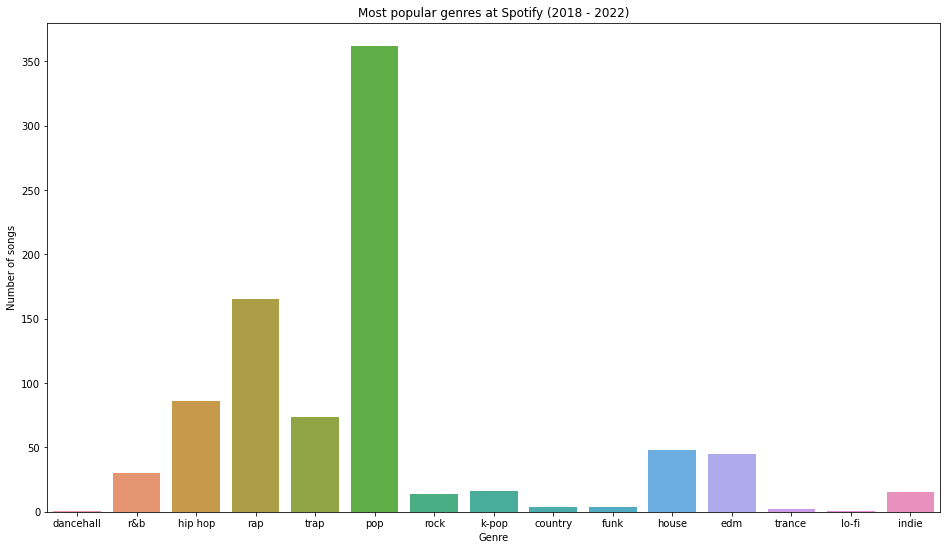

In [9]:
# Plotting the result
plt.figure(figsize = (16, 9))
plt.title('Most popular genres at Spotify (2018 - 2022)')
plt.xlabel('Genre')
plt.ylabel('Number of songs')
sns.barplot(x = list(genre_keyword.keys()), y = list(genre_keyword.values()))
plt.show();

As we can see, pop is by far the most popular genre at spotify. But we are considering the number of occurrences of each keyword at the list of genres the song can be classified.

Now, let's see the results from another perspective, looking at the average of track popularity

In [10]:
# Dictionary with all the genre keywords
genre_keyword_count = {'dancehall': 0, 'r&b': 0, 'hip hop': 0, 'rap': 0, 'trap': 0, 'pop': 0, 'rock': 0, 'k-pop': 0, 
                       'country': 0, 'funk': 0, 'house': 0, 'edm': 0, 'trance': 0, 'house': 0, 'lo-fi': 0, 'indie': 0}

genre_keyword_sum = {'dancehall': 0, 'r&b': 0, 'hip hop': 0, 'rap': 0, 'trap': 0, 'pop': 0, 'rock': 0, 'k-pop': 0, 
                       'country': 0, 'funk': 0, 'house': 0, 'edm': 0, 'trance': 0, 'house': 0, 'lo-fi': 0, 'indie': 0}

In [11]:
# Creating a dictionary with the average of track popularity for each keyword
for keyword in list(genre_keyword.keys()):
    for genre_list, popularity in zip(df.artist_genre, df.track_popularity):
        if keyword in genre_list:
            genre_keyword_count[keyword] += 1
            genre_keyword_sum[keyword] += popularity
            
genre_keyword_average = {keyword: average for keyword, average in zip(list(genre_keyword.keys()), np.array(list(genre_keyword_sum.values()))/np.array(list(genre_keyword_count.values())))}            

In [12]:
# Creating a dataframe to show the result
popularity = pd.DataFrame(data = {"Genre": list(genre_keyword_average.keys()),
                                  "Popularity": list(genre_keyword_average.values())})
popularity = popularity.sort_values('Popularity', ascending = False).reset_index().drop(columns = "index")
popularity

,Genre,Popularity
0,lo-fi,82.000000
1,rock,81.071429
2,dancehall,80.000000
3,r&b,77.600000
4,indie,76.066667
5,hip hop,75.872093
6,trance,75.500000
7,edm,72.977778
8,rap,72.024242
9,country,71.500000


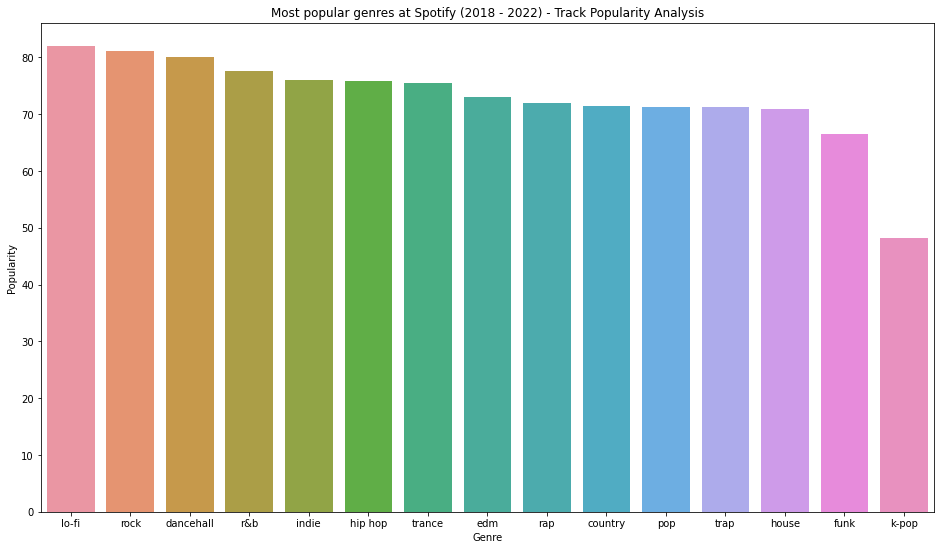

In [13]:
# Plotting the result
plt.figure(figsize = (16, 9))
plt.title('Most popular genres at Spotify (2018 - 2022) - Track Popularity Analysis')
sns.barplot(x = popularity.Genre, y = popularity.Popularity)
plt.show();

Looking at the average popularity, lo-fi has the best score. But it appears just once. So it is better look at the total of occurrences to measure the popularity of a genre.

## What are the 10 most popular artists?

We're gonna tackle this problem by 2 different ways: 
 - The first one, looking at the total number that the artist appeared at the list
 - The second one, the average track popularity by each artist

In [14]:
# Creating a dictionary to save the result
artist_count = {artist: 0 for artist in df.artist.unique()}

In [15]:
# Counting the number of occurrences
for artist in df.artist.values.tolist():
    artist_count[artist] += 1

In [16]:
# Creating a dataframe to better visualize
artists = pd.DataFrame(data = {"Artist": artist_count.keys(),
                               "Number of Occurrences": artist_count.values()})
artists = artists.sort_values('Number of Occurrences', ascending = False).reset_index().drop(columns = 'index')
artists.head(10)

,Artist,Number of Occurrences
0,Ariana Grande,14
1,Billie Eilish,14
2,Drake,13
3,Post Malone,12
4,Taylor Swift,12
5,Bad Bunny,9
6,Lil Nas X,9
7,Justin Bieber,8
8,Marshmello,8
9,Dua Lipa,8


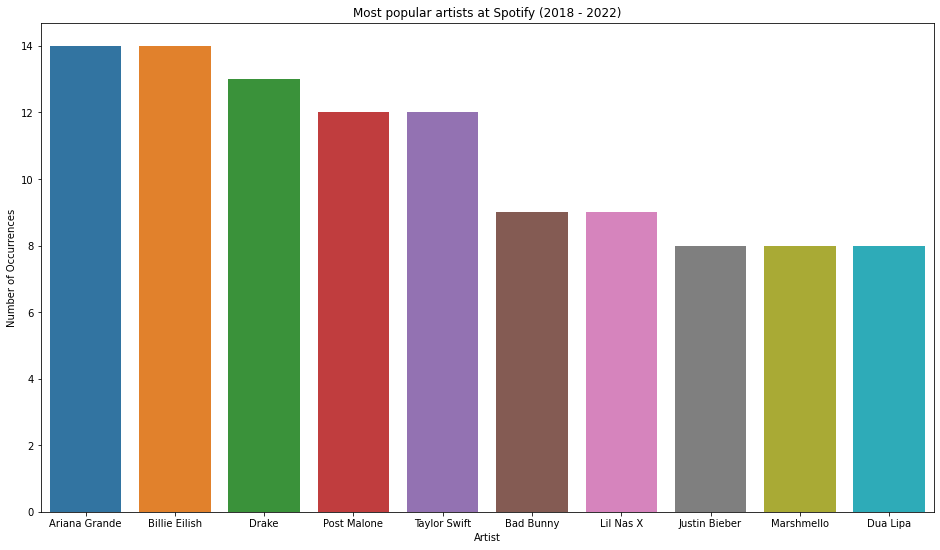

In [17]:
# Plotting the result
plt.figure(figsize = (16, 9))
plt.title('Most popular artists at Spotify (2018 - 2022)')
sns.barplot(x = artists.head(10).Artist, y = artists.head(10)["Number of Occurrences"])
plt.show();

Ariana Grande is the winner using this approach! Furthermore, 40% of 10 most popular artists are female. When we look at the top 20, this percentage decreases to 35%. 

Now, let's use the second approach

In [18]:
# Creating a dictionary to save the result
artist_average = {artist: 0 for artist in df.artist.unique()}

In [19]:
# Saving the result
for artist in df.artist.unique().tolist():
    artist_average[artist] = df.track_popularity[df.artist == artist].mean()

In [20]:
# Creating a dataframe to better visualize
artists_popularity = pd.DataFrame(data = {"Artist": artist_average.keys(),
                               "Average track popularity": artist_average.values()})
artists_popularity = artists_popularity.sort_values('Average track popularity', ascending = False).reset_index().drop(columns = 'index')
artists_popularity.head(10)

,Artist,Average track popularity
0,David Guetta,96.0
1,OneRepublic,93.0
2,Rema,93.0
3,Meghan Trainor,93.0
4,Metro Boomin,93.0
5,Tom Odell,92.0
6,d4vd,91.5
7,Jung Kook,91.0
8,Joji,89.0
9,Harry Styles,88.2


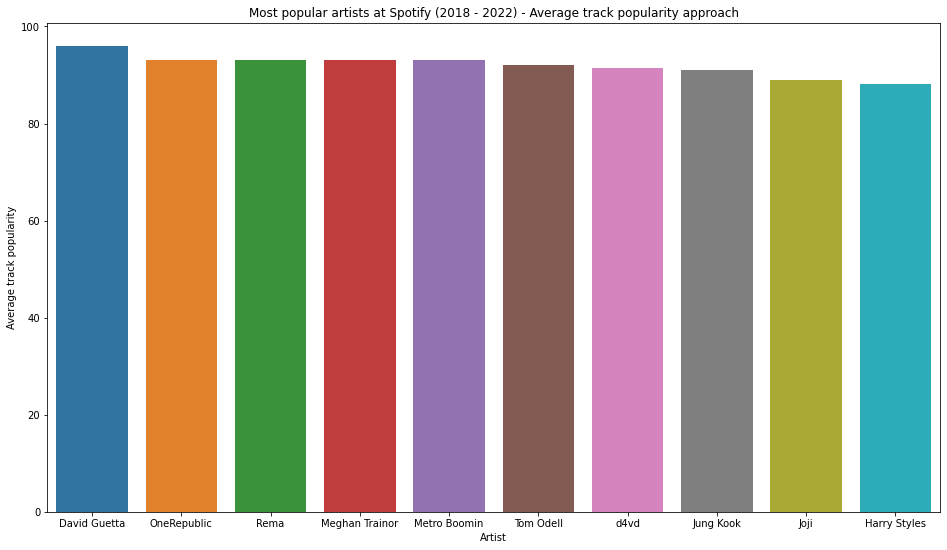

In [21]:
# Plotting the result
plt.figure(figsize = (16, 9))
plt.title('Most popular artists at Spotify (2018 - 2022) - Average track popularity approach')
sns.barplot(x = artists_popularity.head(10).Artist, y = artists_popularity.head(10)["Average track popularity"])
plt.show();

We've got a completely different result. Seeing this, it is important to define clearly what factors we're considering to measure the popularity of an artist. 

## What are the 10 most popular tracks?

In [22]:
# Creating a dictionary to save the result
track_popularity = {track: 0 for track in df.track.unique()}

In [23]:
# Saving the result
for track in df.track.unique().tolist():
    track_popularity[track] = [df.track_popularity[df.track == track].mean(), df.artist[df.track == track].values[0]]

In [24]:
# Creating a dataframe to better visualize
track_popularity = pd.DataFrame(data = {"Track": track_popularity.keys(),
                                        "Artist": np.array(list(track_popularity.values()))[:, 1],
                                        "Average track popularity": np.array(list(track_popularity.values()))[:, 0]})
track_popularity = track_popularity.sort_values('Average track popularity', ascending = False).reset_index().drop(columns = 'index')
track_popularity.head(10)

,Track,Artist,Average track popularity
0,Unholy (feat. Kim Petras),Sam Smith,98.0
1,I'm Good (Blue),David Guetta,96.0
2,Anti-Hero,Taylor Swift,95.0
3,Under The Influence,Chris Brown,94.0
4,Rich Flex,Drake,94.0
5,Tití Me Preguntó,Bad Bunny,94.0
6,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,93.0
7,Calm Down (with Selena Gomez),Rema,93.0
8,Made You Look,Meghan Trainor,93.0
9,I Ain't Worried,OneRepublic,93.0


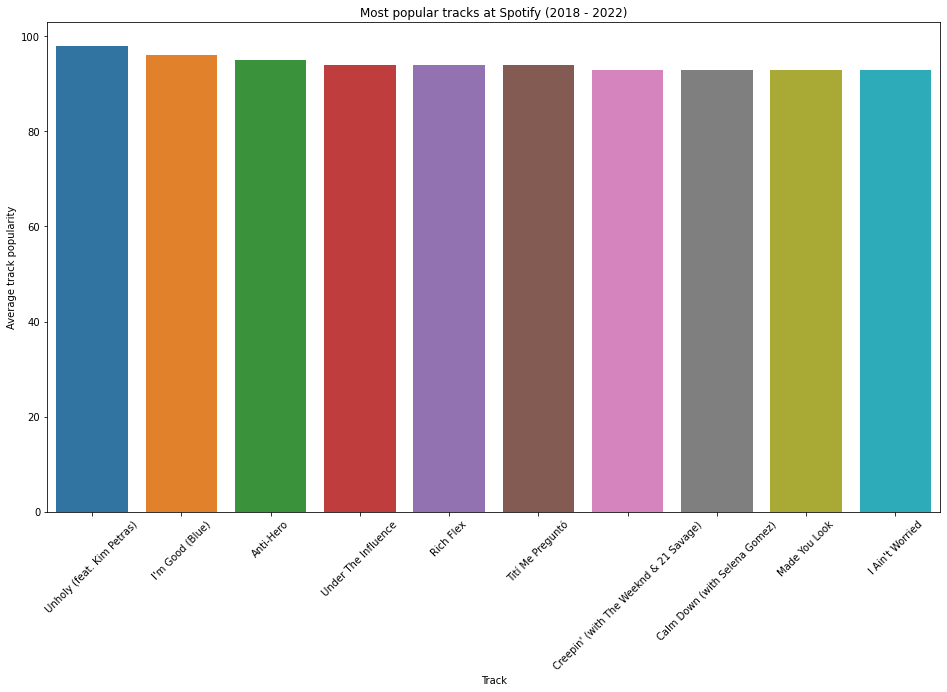

In [25]:
# Plotting the result
plt.figure(figsize = (16, 9))
plt.title('Most popular tracks at Spotify (2018 - 2022)')
sns.barplot(x = track_popularity.head(10).Track, y = track_popularity.head(10)["Average track popularity"].astype('float64'))
plt.xticks(rotation = 45)
plt.show();

These are the 10 most popular Spotify tracks since 2018. Sam Smith got the first place with 98 points of popularity!

## Is the artist popularity positively correlated with track popularity?

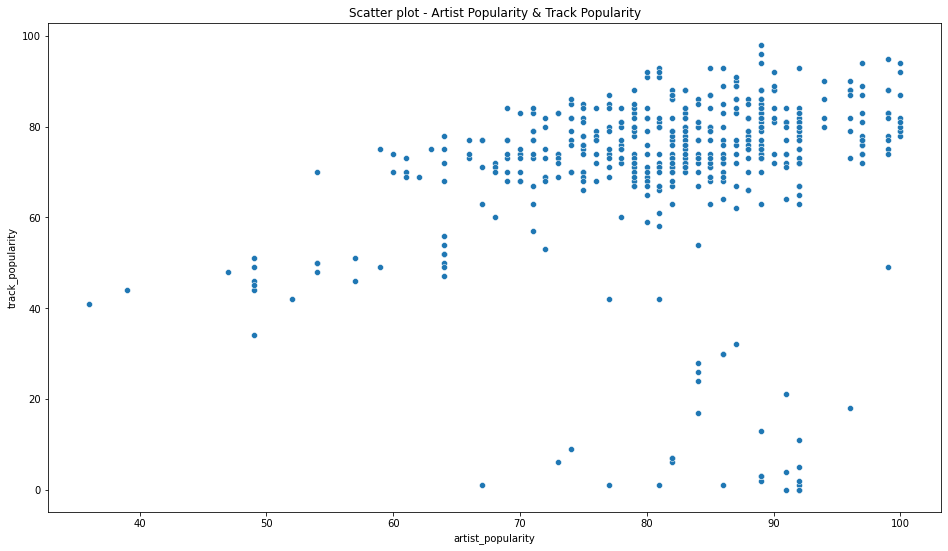

In [27]:
# Let's make a scatter plot using both variables
plt.figure(figsize = (16, 9))
plt.title('Artist Popularity & Track Popularity correlation')
sns.scatterplot(x = df.artist_popularity, y = df.track_popularity)
plt.show();

It seems that the variables are positively correlated, but we can't assume that yet. Let's make two another plots

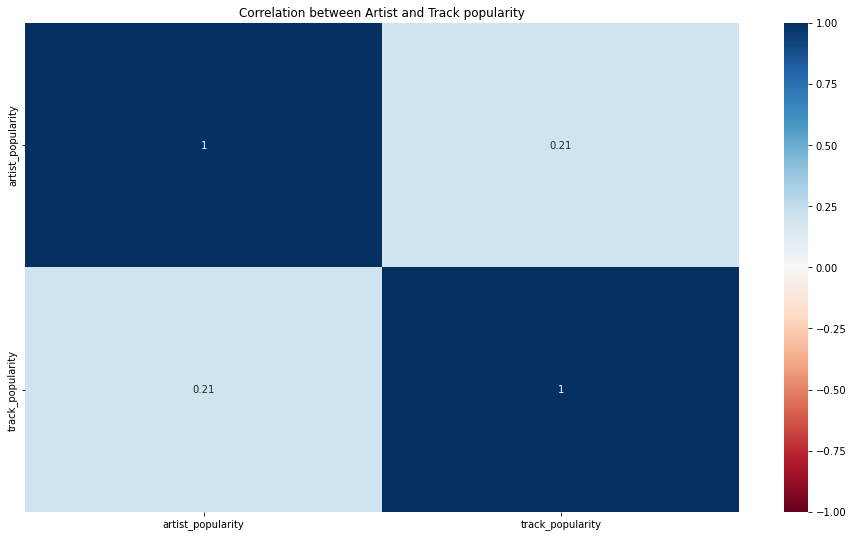

In [32]:
# Plotting a heatmap
plt.figure(figsize = (16, 9))
plt.title('Correlation between Artist and Track popularity')
sns.heatmap(df[['artist_popularity', 'track_popularity']].corr(), annot = True, vmin = -1, vmax = 1, cmap = 'RdBu')
plt.show();

Looking at this plot, we can clearly see that the variables are positively correlated (+ 0.21). Now, let's plot a regression line that better fits to the points at the scatter plot

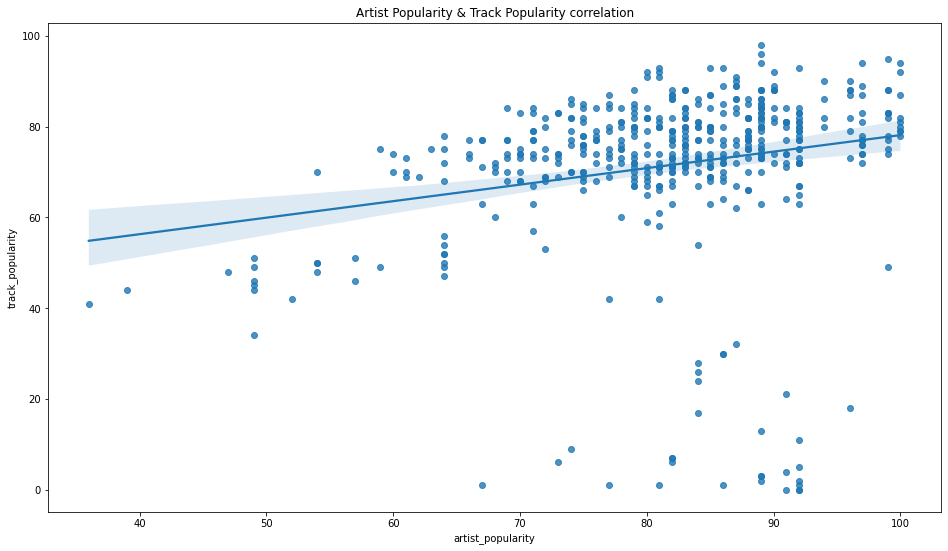

In [33]:
# Plotting the regression line with the scatter plot
plt.figure(figsize = (16, 9))
plt.title('Artist Popularity & Track Popularity correlation')
sns.regplot(x = df.artist_popularity, y = df.track_popularity)
plt.show();

## Considering all the years (2018 - 2022), which of them had the higher average of track popularity?

In [40]:
# Let's use the groupby method
df_grouped = df.groupby('year').mean().sort_values('track_popularity', ascending = False).reset_index()
df_grouped

,year,artist_popularity,followers,track_popularity,danceability,valence,energy,tempo,loudness,speechiness,instrumentalness,liveness,acousticness,key
0,2019,83.34,25377892.57,75.79,0.71353,0.490258,0.62643,121.75362,-6.06485,0.127341,0.006473,0.153169,0.243849,5.18
1,2022,76.77,13024293.77,75.46,0.65254,0.487803,0.65614,124.30901,-6.71991,0.088661,0.023098,0.182329,0.252365,5.02
2,2018,80.70,21113885.54,74.73,0.70092,0.472412,0.66081,117.19075,-5.77531,0.118824,0.002692,0.165777,0.179633,5.82
3,2021,85.25,33262918.14,66.59,0.69239,0.488950,0.61450,119.38212,-6.41291,0.100806,0.006093,0.162127,0.210486,4.75
4,2020,83.46,27760515.10,65.12,0.70500,0.520434,0.61735,121.49077,-6.40410,0.117715,0.012031,0.174082,0.236174,5.48


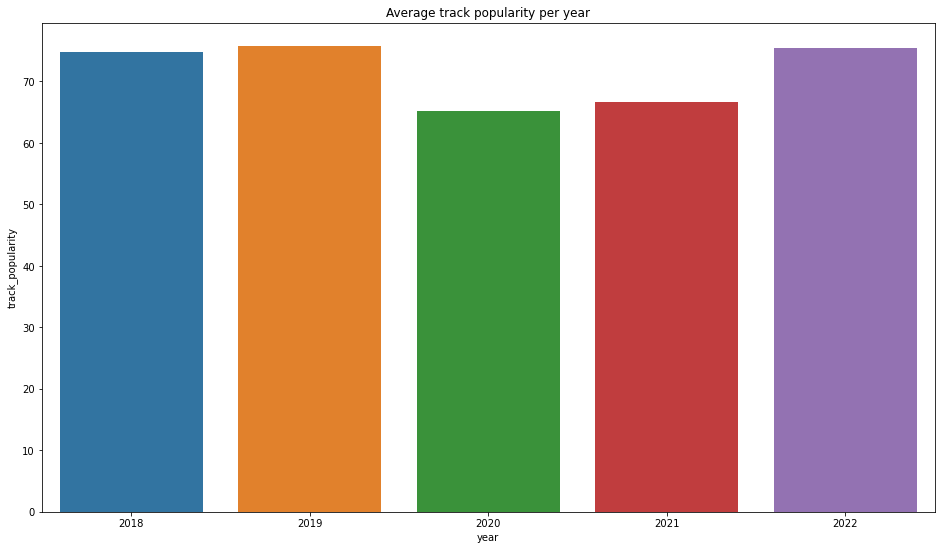

In [41]:
# Plotting the result
plt.figure(figsize = (16, 9))
plt.title("Average track popularity per year")
plt.xlabel('Year')
plt.ylabel('Track Popularity')
sns.barplot(x = df_grouped.year, y = df_grouped.track_popularity)
plt.show();

Looking at the graphic, we can't say which one has the higher popularity: 2019 or 2022. So, we must look at the dataframe 'df_grouped'. And it shows us that 2019 has a higher popularity (0.36 points higher than 2022).

## If we'd like to choose 10 songs for a dance party, which of them should we choose?

Here, I'm gonna consider some factors:

 - Danceability
 - Energy
 
As these variables are in the same scale, we can simply sum them.

The 10 songs with the highest sum will be selected

In [69]:
# Creating an auxiliar dataframe
df_dance = df[['artist', 'track', 'danceability', 'energy']]

In [70]:
# Creating a new variable (sum of all numerical features)
df_dance['features_sum'] = df_dance['danceability'] + df_dance['energy']
df_dance = df_dance.sort_values('features_sum', ascending = False).reset_index().drop(columns = 'index')
df_dance.head(10)

,artist,track,danceability,energy,features_sum
0,Nicki Minaj,Super Freaky Girl,0.950,0.891,1.841
1,AJ Tracey,Ladbroke Grove,0.902,0.839,1.741
2,Latto,Big Energy,0.937,0.793,1.730
3,Saweetie,My Type,0.899,0.811,1.710
4,Ed Sheeran,Bad Habits,0.808,0.897,1.705
5,Calvin Harris,Giant (with Rag'n'Bone Man),0.807,0.887,1.694
6,Sofía Reyes,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",0.792,0.895,1.687
7,Pharrell Williams,Down In Atlanta,0.851,0.819,1.670
8,Cardi B,Up,0.868,0.795,1.663
9,Calvin Harris,One Kiss (with Dua Lipa),0.791,0.862,1.653


So, using this approach, I would select these tracks for a dance party.

That's it! Now, I'm gonna plot a heatmap with the correlation of all numerical variables to end this analysis.

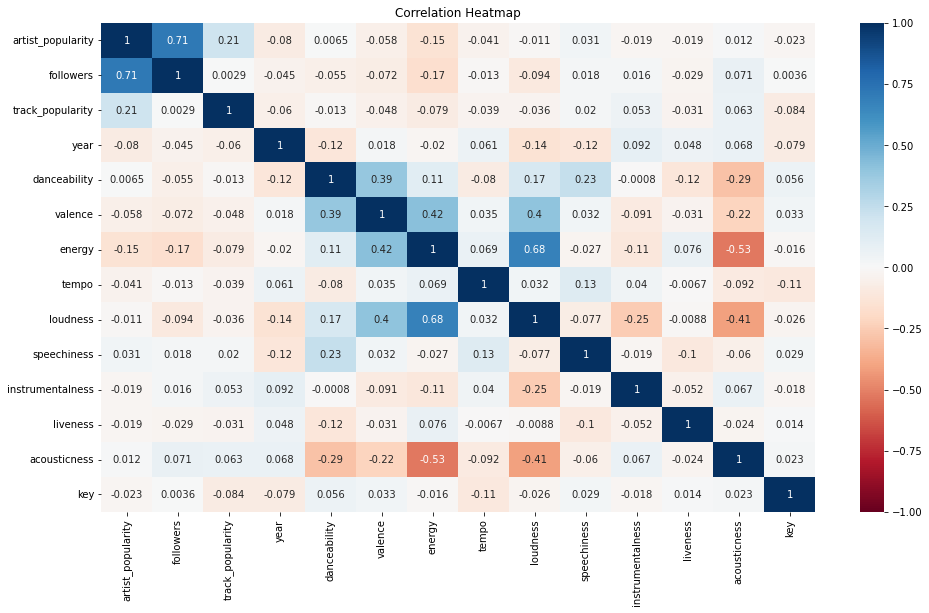

In [73]:
# Plotting the heatmap
plt.figure(figsize = (16, 9))
plt.title('Correlation Heatmap')
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'RdBu')
plt.show();

The only unexpected correlation here for me was the slight positive correlation between speechness and danceability.